In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# supress tensorflow warnings:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# CHANGE THIS:
    # data_directory should be path to where you have placed 'dataset_real_vs_fake_small' folder
data_directory = '/Users/bajram/Desktop/PDP/pdp_training_data/'

In [3]:
# change directory to real training images:
os.chdir(data_directory+'dataset_real_vs_fake_small/train/real_images')
# check:
os.getcwd()

'/Users/bajram/Desktop/PDP/pdp_training_data/dataset_real_vs_fake_small/train/real_images'

In [4]:
# check list and files seem right:
real_names = os.listdir()
print(len(real_names))
real_names[0:4]  

1200


['30558.jpeg', '48790.jpeg', '19770.jpeg', '47520.jpeg']

In [5]:
os.chdir(data_directory +'/dataset_real_vs_fake_small/train/fake_images')
# check list and files seem right:
fake_names = os.listdir()
print(len(real_names))
fake_names[0:4]  

1200


['image-2019-02-17_150235.jpeg',
 'image-2019-02-17_112046.jpeg',
 'image-2019-02-18_034504.jpeg',
 'image-2019-02-19_045618.jpeg']

In [6]:
# change directory to one step back out from image files:
os.chdir(data_directory)

Set of Randomly Selected Real Images:


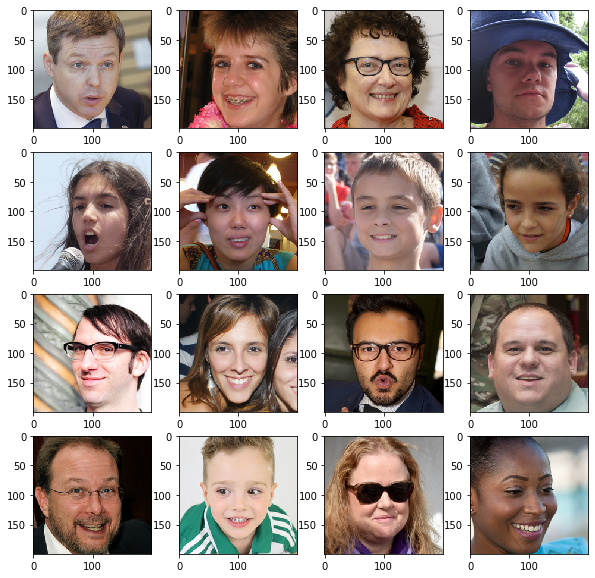

In [7]:
# show 16 randomly chosen real pictures:

print("Set of Randomly Selected Real Images:")
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    currPic = 'dataset_real_vs_fake_small/train/real_images/' + random.choice(real_names)
    img = imread(currPic)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Set of Randomly Selected Fake Images:


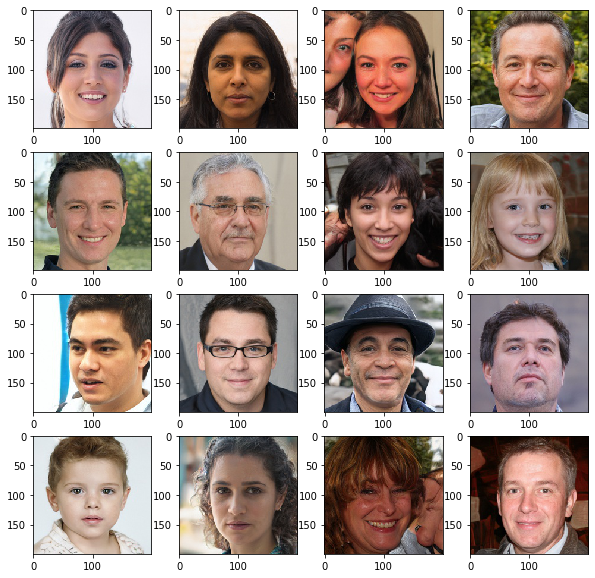

In [8]:
# show 16 randomly chosen fake pictures:

print("Set of Randomly Selected Fake Images:")
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    currPic = 'dataset_real_vs_fake_small/train/fake_images/' + random.choice(fake_names)
    img = imread(currPic)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## MODEL 1: 1 LAYER CNN 20 EPOCHS:

In [145]:
# initial CNN model:
def model_1():
    # 3x3 kernel size best
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200,200, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the results for dense layer:
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    
    # output neuron (probability):
    model.add(Dense(1, activation='sigmoid'))
    
    # choose optimizer:
    opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    
    # compile:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [146]:
# Create training and testing data:
    
# normalize the data:
data_norm = ImageDataGenerator(rescale=1.0/255.0)
# create train, test
train = data_norm.flow_from_directory('dataset_real_vs_fake_small/train/',
    class_mode='binary', batch_size=64, target_size=(200,200))
test = data_norm.flow_from_directory('dataset_real_vs_fake_small/test/',
    class_mode='binary', batch_size=64, target_size=(200,200))

# batch size, momentum, learning rate, general architecture, from paper 

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [147]:
# make model:  
model = model_1()
# fit:
history = model.fit(train, validation_data = test, epochs=20, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/20
38/38 [==============================] - 106s 3s/step - loss: 0.7814 - accuracy: 0.5013 - val_loss: 0.6873 - val_accuracy: 0.6333
Epoch 2/20
38/38 [==============================] - 92s 2s/step - loss: 0.6821 - accuracy: 0.5996 - val_loss: 0.6791 - val_accuracy: 0.5683
Epoch 3/20
38/38 [==============================] - 88s 2s/step - loss: 0.6651 - accuracy: 0.6037 - val_loss: 0.6383 - val_accuracy: 0.6733
Epoch 4/20
38/38 [==============================] - 91s 2s/step - loss: 0.6228 - accuracy: 0.6625 - val_loss: 0.6525 - val_accuracy: 0.6083
Epoch 5/20
38/38 [==============================] - 92s 2s/step - loss: 0.6057 - accuracy: 0.6767 - val_loss: 0.5994 - val_accuracy: 0.6850
Epoch 6/20
38/38 [==============================] - 97s 3s/step - loss: 0.6214 - accuracy: 0.6754 - val_loss: 0.6111 - val_accuracy: 0.6633
Epoch 7/20
38/38 [==============================] - 104s 3s/step - loss: 0.5905 - accuracy: 0.6862 - val_loss: 0.6212

[0.65844025015831, 0.705]

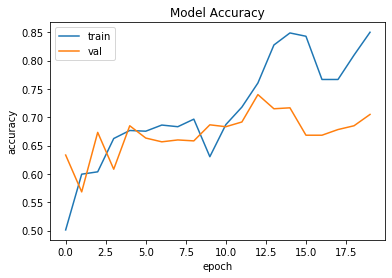

In [148]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('model_1_20epoch_acc.png')

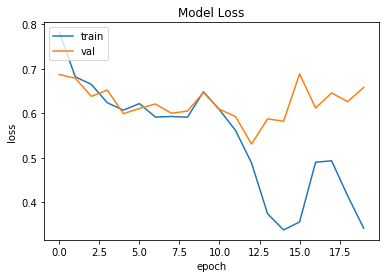

In [149]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('model_1_20epoch_loss.png')

## MODEL 2: 1 LAYER VGG CNN 100 EPOCHS

In [83]:
def model_2():
    # 3x3 kernel size best
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200,200, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the results for dense layer:
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    
    # output neuron (probability):
    model.add(Dense(1, activation='sigmoid'))
    
    # choose optimizer:
    opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    
    # compile:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# make model:  
model = model_2()
# fit
history = model.fit(train, validation_data = test, epochs=100, verbose=1)
# eval
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/100
38/38 [==============================] - 124s 3s/step - loss: 0.7269 - accuracy: 0.5225 - val_loss: 0.6862 - val_accuracy: 0.6617
Epoch 2/100
38/38 [==============================] - 125s 3s/step - loss: 0.6702 - accuracy: 0.6104 - val_loss: 0.6293 - val_accuracy: 0.6583
Epoch 3/100
38/38 [==============================] - 108s 3s/step - loss: 0.6544 - accuracy: 0.6317 - val_loss: 0.6587 - val_accuracy: 0.6300
Epoch 4/100
38/38 [==============================] - 102s 3s/step - loss: 0.6333 - accuracy: 0.6550 - val_loss: 0.6309 - val_accuracy: 0.6650
Epoch 5/100
38/38 [==============================] - 98s 3s/step - loss: 0.6102 - accuracy: 0.6829 - val_loss: 0.5948 - val_accuracy: 0.6967
Epoch 6/100
38/38 [==============================] - 106s 3s/step - loss: 0.5498 - accuracy: 0.7321 - val_loss: 0.5703 - val_accuracy: 0.7017
Epoch 7/100
38/38 [==============================] - 95s 3s/step - loss: 0.5417 - accuracy: 0.7217 - val_lo

[1.1221695482730865, 0.75]

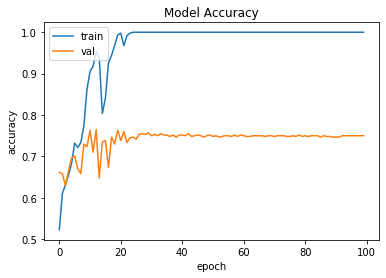

In [32]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('model_2_100epoch_acc.png')

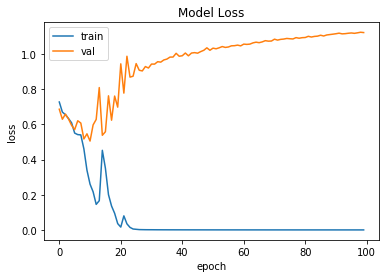

In [33]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('model_2_100epoch_loss.png')

## BACKPROP MODEL 20 EPOCHS

In [63]:
def backprop_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(64, input_shape=(200,200,3), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [64]:
# make model:  
model = backprop_model()
# fit:
history = model.fit(train, validation_data = test, epochs=20, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/20
38/38 [==============================] - 6s 148ms/step - loss: 0.7087 - accuracy: 0.5075 - val_loss: 0.6847 - val_accuracy: 0.5933
Epoch 2/20
38/38 [==============================] - 6s 145ms/step - loss: 0.6820 - accuracy: 0.5663 - val_loss: 0.6694 - val_accuracy: 0.5983
Epoch 3/20
38/38 [==============================] - 6s 160ms/step - loss: 0.6850 - accuracy: 0.5771 - val_loss: 0.6838 - val_accuracy: 0.5317
Epoch 4/20
38/38 [==============================] - 5s 140ms/step - loss: 0.6685 - accuracy: 0.5958 - val_loss: 0.6408 - val_accuracy: 0.6383
Epoch 5/20
38/38 [==============================] - 5s 140ms/step - loss: 0.6747 - accuracy: 0.5992 - val_loss: 0.6486 - val_accuracy: 0.6583
Epoch 6/20
38/38 [==============================] - 5s 139ms/step - loss: 0.6531 - accuracy: 0.6254 - val_loss: 0.6331 - val_accuracy: 0.6667
Epoch 7/20
38/38 [==============================] - 5s 144ms/step - loss: 0.6539 - accuracy: 0.6212 - val_

[0.6070825815200805, 0.6616667]

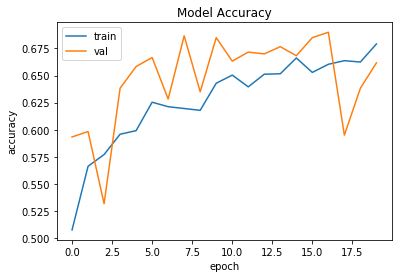

In [67]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('backprop_model_accuracy_20_epochs')

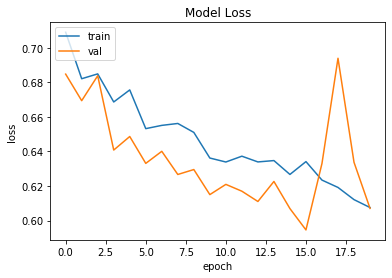

In [68]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('backprop_model_loss_20_epochs.png')

## BACKPROP MODEL 100 EPOCHS

In [69]:
def backprop_model_2():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(64, input_shape=(200,200,3), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [70]:
# make model:  
model = backprop_model_2()
# fit:
history = model.fit(train, validation_data = test, epochs=100, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/100
38/38 [==============================] - 7s 175ms/step - loss: 0.8043 - accuracy: 0.5300 - val_loss: 0.6877 - val_accuracy: 0.5017
Epoch 2/100
38/38 [==============================] - 6s 151ms/step - loss: 0.6928 - accuracy: 0.5279 - val_loss: 0.6753 - val_accuracy: 0.5833
Epoch 3/100
38/38 [==============================] - 6s 156ms/step - loss: 0.6898 - accuracy: 0.5500 - val_loss: 0.6952 - val_accuracy: 0.5100
Epoch 4/100
38/38 [==============================] - 6s 154ms/step - loss: 0.6785 - accuracy: 0.5846 - val_loss: 0.6818 - val_accuracy: 0.5567
Epoch 5/100
38/38 [==============================] - 6s 145ms/step - loss: 0.6683 - accuracy: 0.5925 - val_loss: 0.6544 - val_accuracy: 0.6017
Epoch 6/100
38/38 [==============================] - 6s 160ms/step - loss: 0.6693 - accuracy: 0.6000 - val_loss: 0.6389 - val_accuracy: 0.6583
Epoch 7/100
38/38 [==============================] - 6s 153ms/step - loss: 0.6600 - accuracy: 0.6067

[0.6701850831508637, 0.69]

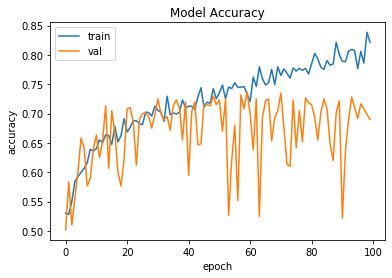

In [71]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('backprop_model_accuracy_100_epochs')

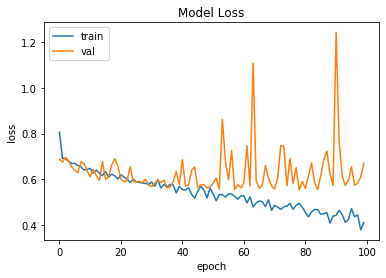

In [72]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('backprop_model_loss_100_epochs.png')

## CNN VGG MODEL WITH 2 CONVOLUTIONAL LAYERS 20 EPOCHS:

In [75]:
def model_3():
    # 3x3 kernel size best
    model = Sequential()
    # first convolutional layer:
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200,200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # second convolutional layer:
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    
    
    # Flatten the results for fully-connected layer:
    model.add(Flatten())
    # fully-connected layer:
    model.add(Dense(100, activation='relu'))
    # output neuron (probability):
    model.add(Dense(1, activation='sigmoid'))
    
    # choose optimizer:
    opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    
    # compile:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [76]:
# make model:  
model = model_3()
# fit:
history = model.fit(train, validation_data = test, epochs=20, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/20
38/38 [==============================] - 275s 7s/step - loss: 0.7020 - accuracy: 0.5121 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/20
38/38 [==============================] - 265s 7s/step - loss: 0.6885 - accuracy: 0.5321 - val_loss: 0.6771 - val_accuracy: 0.6533
Epoch 3/20
38/38 [==============================] - 259s 7s/step - loss: 0.6751 - accuracy: 0.5933 - val_loss: 0.6472 - val_accuracy: 0.6150
Epoch 4/20
38/38 [==============================] - 300s 8s/step - loss: 0.6415 - accuracy: 0.6388 - val_loss: 0.6286 - val_accuracy: 0.6467
Epoch 5/20
38/38 [==============================] - 285s 7s/step - loss: 0.6101 - accuracy: 0.6612 - val_loss: 0.6072 - val_accuracy: 0.6550
Epoch 6/20
38/38 [==============================] - 289s 8s/step - loss: 0.5882 - accuracy: 0.6904 - val_loss: 0.5653 - val_accuracy: 0.7117
Epoch 7/20
38/38 [==============================] - 246s 6s/step - loss: 0.5656 - accuracy: 0.7096 - val_loss: 0

[0.9958539009094238, 0.76]

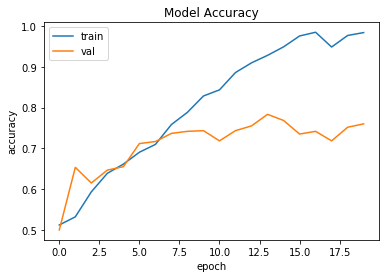

In [77]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('cnn_2_layers_accuracy_20_epochs')

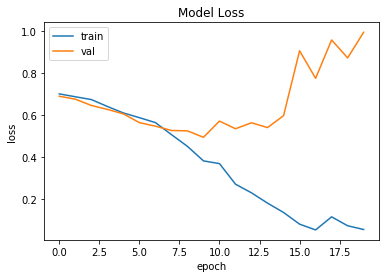

In [78]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('cnn_2_layers_loss_20_epochs')

## BACKPROP MODEL WITH WEIGHTS REGULARIZED:

In [88]:
def backprop_model_regularized():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(64, input_shape=(200,200,3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [89]:
# make model:  
model = backprop_model_regularized()
# fit:
history = model.fit(train, validation_data = test, epochs=100, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/100
38/38 [==============================] - 16s 429ms/step - loss: 1.1989 - accuracy: 0.4875 - val_loss: 0.8650 - val_accuracy: 0.5000
Epoch 2/100
38/38 [==============================] - 13s 344ms/step - loss: 0.8660 - accuracy: 0.5071 - val_loss: 0.8652 - val_accuracy: 0.5000
Epoch 3/100
38/38 [==============================] - 8s 210ms/step - loss: 0.8648 - accuracy: 0.5229 - val_loss: 0.8689 - val_accuracy: 0.5000
Epoch 4/100
38/38 [==============================] - 7s 177ms/step - loss: 0.8606 - accuracy: 0.5433 - val_loss: 0.8538 - val_accuracy: 0.5550
Epoch 5/100
38/38 [==============================] - 7s 178ms/step - loss: 0.8522 - accuracy: 0.5883 - val_loss: 0.8379 - val_accuracy: 0.6117
Epoch 6/100
38/38 [==============================] - 7s 182ms/step - loss: 0.8533 - accuracy: 0.5738 - val_loss: 0.8593 - val_accuracy: 0.5350
Epoch 7/100
38/38 [==============================] - 6s 169ms/step - loss: 0.8422 - accuracy: 0.59

[0.8503657102584838, 0.6383333]

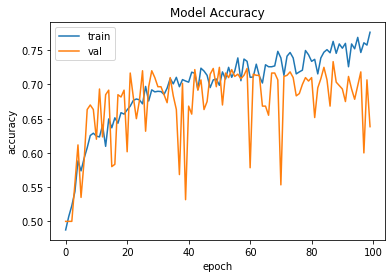

In [90]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('backprop_weights_regularized_accuracy_100_epochs')

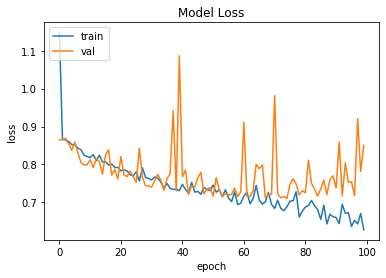

In [91]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('backprop_weights_regularized_widths_loss_100_epochs')

## BACKPROP WIDE AND DEEP NET:

In [93]:
def backprop_model_wide_deep():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(128, input_shape=(200,200,3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [94]:
# make model:  
model = backprop_model_wide_deep()
# fit:
history = model.fit(train, validation_data = test, epochs=200, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/200
38/38 [==============================] - 17s 437ms/step - loss: 1.1036 - accuracy: 0.5183 - val_loss: 1.0688 - val_accuracy: 0.5033
Epoch 2/200
38/38 [==============================] - 12s 323ms/step - loss: 1.0672 - accuracy: 0.5633 - val_loss: 1.0507 - val_accuracy: 0.6233
Epoch 3/200
38/38 [==============================] - 9s 224ms/step - loss: 1.0619 - accuracy: 0.5663 - val_loss: 1.0479 - val_accuracy: 0.6250
Epoch 4/200
38/38 [==============================] - 9s 239ms/step - loss: 1.0488 - accuracy: 0.5983 - val_loss: 1.0573 - val_accuracy: 0.5633
Epoch 5/200
38/38 [==============================] - 9s 234ms/step - loss: 1.0473 - accuracy: 0.5925 - val_loss: 1.0265 - val_accuracy: 0.6667
Epoch 6/200
38/38 [==============================] - 11s 300ms/step - loss: 1.0315 - accuracy: 0.6187 - val_loss: 1.0306 - val_accuracy: 0.6100
Epoch 7/200
38/38 [==============================] - 13s 333ms/step - loss: 1.0380 - accuracy: 0.

Epoch 114/200
38/38 [==============================] - 12s 311ms/step - loss: 0.6968 - accuracy: 0.8333 - val_loss: 1.0671 - val_accuracy: 0.6450
Epoch 115/200
38/38 [==============================] - 14s 366ms/step - loss: 0.6384 - accuracy: 0.8737 - val_loss: 0.9540 - val_accuracy: 0.7167
Epoch 116/200
38/38 [==============================] - 16s 416ms/step - loss: 0.6498 - accuracy: 0.8687 - val_loss: 1.1193 - val_accuracy: 0.5983
Epoch 117/200
38/38 [==============================] - 10s 275ms/step - loss: 0.7100 - accuracy: 0.8471 - val_loss: 0.9514 - val_accuracy: 0.7433
Epoch 118/200
38/38 [==============================] - 10s 260ms/step - loss: 0.6428 - accuracy: 0.8650 - val_loss: 0.9396 - val_accuracy: 0.7233
Epoch 119/200
38/38 [==============================] - 9s 243ms/step - loss: 0.6672 - accuracy: 0.8579 - val_loss: 0.9801 - val_accuracy: 0.7083
Epoch 120/200
38/38 [==============================] - 13s 333ms/step - loss: 0.6632 - accuracy: 0.8604 - val_loss: 0.9586 - 

[1.314679205417633, 0.56666666]

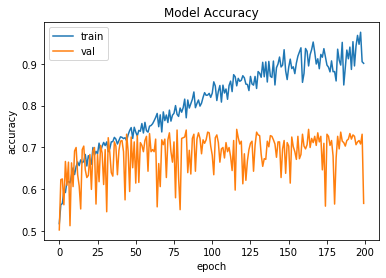

In [97]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('backprop_weights_regularized_wide_deep_accuracy_200_epochs')

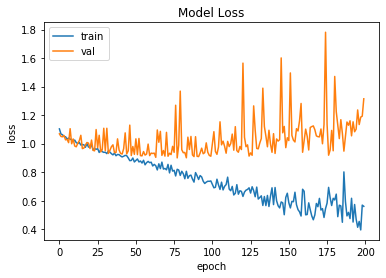

In [98]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('backprop_weights_regularized_wide_deep_loss_200_epochs')

## CNN MODEL WITH WEIGHTS REGULARIZED:

In [101]:
def cnn_regularized():
    # 3x3 kernel size best
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200,200, 3), kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the results for dense layer:
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
    
    # output neuron (probability):
    model.add(Dense(1, activation='sigmoid'))
    
    # choose optimizer:
    opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    
    # compile:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [102]:
# make model:  
model = cnn_regularized()
# fit:
history = model.fit(train, validation_data = test, epochs=20, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/20
38/38 [==============================] - 119s 3s/step - loss: 0.9352 - accuracy: 0.5183 - val_loss: 0.8959 - val_accuracy: 0.5833
Epoch 2/20
38/38 [==============================] - 106s 3s/step - loss: 0.8886 - accuracy: 0.5596 - val_loss: 0.8743 - val_accuracy: 0.5867
Epoch 3/20
38/38 [==============================] - 111s 3s/step - loss: 0.8693 - accuracy: 0.6087 - val_loss: 0.8853 - val_accuracy: 0.5167
Epoch 4/20
38/38 [==============================] - 139s 4s/step - loss: 0.8572 - accuracy: 0.6225 - val_loss: 0.8211 - val_accuracy: 0.6717
Epoch 5/20
38/38 [==============================] - 111s 3s/step - loss: 0.8050 - accuracy: 0.6787 - val_loss: 0.7948 - val_accuracy: 0.6850
Epoch 6/20
38/38 [==============================] - 98s 3s/step - loss: 0.7484 - accuracy: 0.7250 - val_loss: 0.7514 - val_accuracy: 0.7150
Epoch 7/20
38/38 [==============================] - 97s 3s/step - loss: 0.7337 - accuracy: 0.7262 - val_loss: 0.7

[1.0614901661872864, 0.75666666]

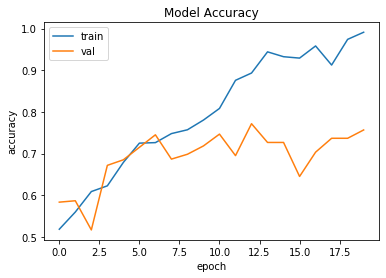

In [103]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('cnn_regularized_accuracy_20_epochs')

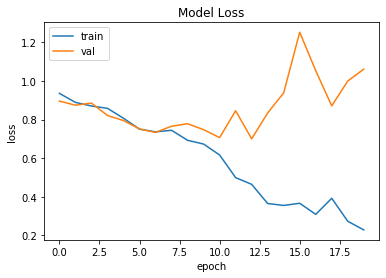

In [104]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('cnn_regularized_loss_20_epochs')

## BACKPROP DROPOUT NETWORK 100 EPOCHS

In [116]:
def backprop_model_dropout():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(64, input_shape=(200,200,3), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [117]:
# make model:  
model = backprop_model_dropout()
# fit:
history = model.fit(train, validation_data = test, epochs=100, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/100
38/38 [==============================] - 15s 401ms/step - loss: 0.7718 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 2/100
38/38 [==============================] - 14s 362ms/step - loss: 0.6940 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
38/38 [==============================] - 14s 373ms/step - loss: 0.6934 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 4/100
38/38 [==============================] - 15s 386ms/step - loss: 0.6940 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/100
38/38 [==============================] - 15s 389ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
38/38 [==============================] - 13s 330ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
38/38 [==============================] - 14s 377ms/step - loss: 0.6932 - accuracy:

[0.6315616965293884, 0.6716667]

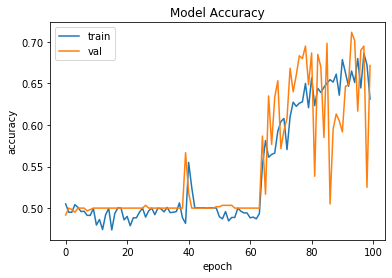

In [118]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('backprop_dropout_accuracy_100_epochs')

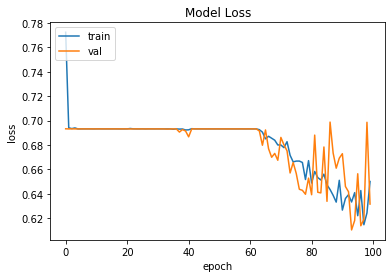

In [119]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('backprop_dropout_loss_100_epochs')

## BACKPROP DROPOUT 500 EPOCHS:

In [120]:
# make model:  
model = backprop_model_dropout()
# fit:
history = model.fit(train, validation_data = test, epochs=500, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/500
38/38 [==============================] - 15s 385ms/step - loss: 0.9265 - accuracy: 0.4833 - val_loss: 0.6828 - val_accuracy: 0.5633
Epoch 2/500
38/38 [==============================] - 15s 386ms/step - loss: 0.7000 - accuracy: 0.5079 - val_loss: 0.6877 - val_accuracy: 0.5700
Epoch 3/500
38/38 [==============================] - 13s 339ms/step - loss: 0.6858 - accuracy: 0.5425 - val_loss: 0.6735 - val_accuracy: 0.6067
Epoch 4/500
38/38 [==============================] - 13s 337ms/step - loss: 0.6879 - accuracy: 0.5342 - val_loss: 0.6729 - val_accuracy: 0.5683
Epoch 5/500
38/38 [==============================] - 13s 332ms/step - loss: 0.6789 - accuracy: 0.5863 - val_loss: 0.6642 - val_accuracy: 0.6100
Epoch 6/500
38/38 [==============================] - 12s 325ms/step - loss: 0.6739 - accuracy: 0.5813 - val_loss: 0.6544 - val_accuracy: 0.5867
Epoch 7/500
38/38 [==============================] - 13s 333ms/step - loss: 0.7015 - accuracy:

Epoch 114/500
38/38 [==============================] - 7s 182ms/step - loss: 0.4864 - accuracy: 0.7550 - val_loss: 0.5513 - val_accuracy: 0.7083
Epoch 115/500
38/38 [==============================] - 7s 182ms/step - loss: 0.5400 - accuracy: 0.7354 - val_loss: 0.6516 - val_accuracy: 0.6467
Epoch 116/500
38/38 [==============================] - 7s 177ms/step - loss: 0.5145 - accuracy: 0.7517 - val_loss: 0.5554 - val_accuracy: 0.7200
Epoch 117/500
38/38 [==============================] - 8s 206ms/step - loss: 0.4968 - accuracy: 0.7600 - val_loss: 0.5790 - val_accuracy: 0.7017
Epoch 118/500
38/38 [==============================] - 14s 370ms/step - loss: 0.5526 - accuracy: 0.7033 - val_loss: 0.5540 - val_accuracy: 0.7367
Epoch 119/500
38/38 [==============================] - 8s 201ms/step - loss: 0.5387 - accuracy: 0.7267 - val_loss: 0.6297 - val_accuracy: 0.6633
Epoch 120/500
38/38 [==============================] - 6s 154ms/step - loss: 0.5810 - accuracy: 0.7008 - val_loss: 0.6365 - val_a

38/38 [==============================] - 8s 212ms/step - loss: 0.5079 - accuracy: 0.7508 - val_loss: 0.5611 - val_accuracy: 0.7267
Epoch 227/500
38/38 [==============================] - 7s 179ms/step - loss: 0.5127 - accuracy: 0.7621 - val_loss: 0.5573 - val_accuracy: 0.7283
Epoch 228/500
38/38 [==============================] - 7s 176ms/step - loss: 0.5087 - accuracy: 0.7804 - val_loss: 0.5496 - val_accuracy: 0.7267
Epoch 229/500
38/38 [==============================] - 7s 172ms/step - loss: 0.5037 - accuracy: 0.7675 - val_loss: 0.5482 - val_accuracy: 0.7167
Epoch 230/500
38/38 [==============================] - 7s 194ms/step - loss: 0.4524 - accuracy: 0.7967 - val_loss: 0.6645 - val_accuracy: 0.6650
Epoch 231/500
38/38 [==============================] - 9s 225ms/step - loss: 0.5054 - accuracy: 0.7467 - val_loss: 0.6340 - val_accuracy: 0.6783
Epoch 232/500
38/38 [==============================] - 7s 187ms/step - loss: 0.4950 - accuracy: 0.7667 - val_loss: 0.6555 - val_accuracy: 0.6800

38/38 [==============================] - 7s 188ms/step - loss: 0.4002 - accuracy: 0.8154 - val_loss: 0.5861 - val_accuracy: 0.6967
Epoch 339/500
38/38 [==============================] - 7s 193ms/step - loss: 0.4015 - accuracy: 0.8158 - val_loss: 0.9506 - val_accuracy: 0.6500
Epoch 340/500
38/38 [==============================] - 7s 195ms/step - loss: 0.3968 - accuracy: 0.8175 - val_loss: 0.7288 - val_accuracy: 0.7050
Epoch 341/500
38/38 [==============================] - 7s 188ms/step - loss: 0.4282 - accuracy: 0.7862 - val_loss: 0.6710 - val_accuracy: 0.7133
Epoch 342/500
38/38 [==============================] - 7s 187ms/step - loss: 0.3888 - accuracy: 0.8283 - val_loss: 0.6033 - val_accuracy: 0.6983
Epoch 343/500
38/38 [==============================] - 7s 188ms/step - loss: 0.4511 - accuracy: 0.8121 - val_loss: 0.6121 - val_accuracy: 0.6983
Epoch 344/500
38/38 [==============================] - 7s 194ms/step - loss: 0.4319 - accuracy: 0.8087 - val_loss: 0.9030 - val_accuracy: 0.6350

38/38 [==============================] - 8s 216ms/step - loss: 0.5886 - accuracy: 0.6267 - val_loss: 0.6079 - val_accuracy: 0.6867
Epoch 451/500
38/38 [==============================] - 10s 264ms/step - loss: 0.5441 - accuracy: 0.6971 - val_loss: 0.6296 - val_accuracy: 0.6750
Epoch 452/500
38/38 [==============================] - 9s 245ms/step - loss: 0.5253 - accuracy: 0.7050 - val_loss: 0.6412 - val_accuracy: 0.6817
Epoch 453/500
38/38 [==============================] - 9s 232ms/step - loss: 0.5201 - accuracy: 0.7242 - val_loss: 0.8123 - val_accuracy: 0.6467
Epoch 454/500
38/38 [==============================] - 9s 226ms/step - loss: 0.4601 - accuracy: 0.7708 - val_loss: 0.7946 - val_accuracy: 0.7100
Epoch 455/500
38/38 [==============================] - 9s 224ms/step - loss: 0.3355 - accuracy: 0.8533 - val_loss: 0.8237 - val_accuracy: 0.7083
Epoch 456/500
38/38 [==============================] - 7s 190ms/step - loss: 0.3832 - accuracy: 0.8175 - val_loss: 0.9346 - val_accuracy: 0.600

[0.6519761681556702, 0.58166665]

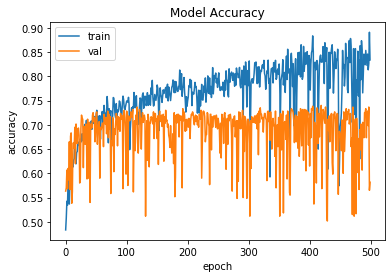

In [121]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('backprop_dropout_accuracy_500_epochs')

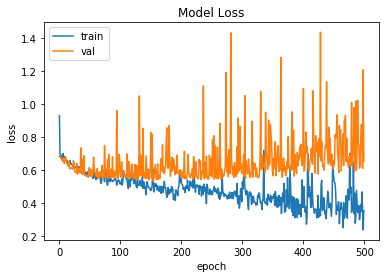

In [122]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('backprop_dropout_loss_500_epochs')

# CNN DROPOUT NETWORK:

In [123]:
def cnn_model_dropout():
    # 3x3 kernel size best
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200,200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Flatten the results for dense layer:
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    
    # output neuron (probability):
    model.add(Dense(1, activation='sigmoid'))
    
    # choose optimizer:
    opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    
    # compile:
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [124]:
# make model:  
model = cnn_model_dropout()
# fit:
history = model.fit(train, validation_data = test, epochs=20, verbose=1)
# eval:
model.evaluate(test)

Train for 38 steps, validate for 10 steps
Epoch 1/20
38/38 [==============================] - 133s 3s/step - loss: 0.7203 - accuracy: 0.5004 - val_loss: 0.6917 - val_accuracy: 0.5333
Epoch 2/20
38/38 [==============================] - 119s 3s/step - loss: 0.6876 - accuracy: 0.5625 - val_loss: 0.6804 - val_accuracy: 0.5283
Epoch 3/20
38/38 [==============================] - 132s 3s/step - loss: 0.6695 - accuracy: 0.5946 - val_loss: 0.6692 - val_accuracy: 0.5817
Epoch 4/20
38/38 [==============================] - 117s 3s/step - loss: 0.6344 - accuracy: 0.6567 - val_loss: 0.6686 - val_accuracy: 0.5600
Epoch 5/20
38/38 [==============================] - 123s 3s/step - loss: 0.6294 - accuracy: 0.6550 - val_loss: 0.6268 - val_accuracy: 0.6333
Epoch 6/20
38/38 [==============================] - 118s 3s/step - loss: 0.5913 - accuracy: 0.7092 - val_loss: 0.5566 - val_accuracy: 0.7000
Epoch 7/20
38/38 [==============================] - 108s 3s/step - loss: 0.5292 - accuracy: 0.7421 - val_loss: 0

[0.7039724975824356, 0.75166667]

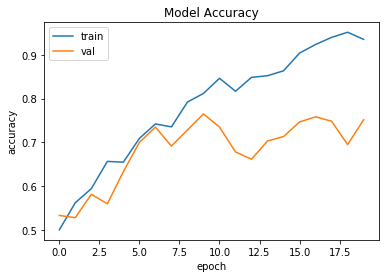

In [125]:
# plot accuracy of both training and testing data over time:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
# export image to file:
plt.savefig('cnn_dropout_accuracy_20_epochs')

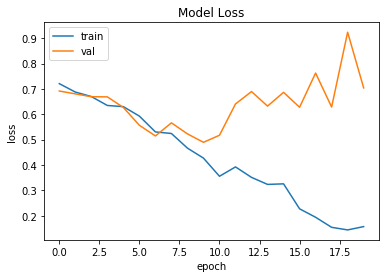

In [126]:
# plot loss of both training and testing data over time:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()
plt.savefig('cnn_dropout_loss_20_epochs')